In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import *
from scipy import optimize
from wavefunction import *
from wavefunction.wavefunction1d import *
from wavefunction.utils import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
def U_ho(x, args):
    """
    Harmonic oscillator potential
    """
    
    k = args['k']
    x0    = args['x0']
    
    u = 1/2 * k * ((x - x0) ** 2)

    return u

In [3]:
def E_versus_ng(ng_list, params,args):
    E_J =params['EJ']
    E_C = params['EC']
    E_L = params['EL']
    E_CL = params['ECL']
    Delta_E_J =params['Delta_EJ']
    phi0 = args['Phi0']
    
    phi_min = args['Phi_min']
    phi_max = args['Phi_max']
    N=args['gridsize'] # grid size along coordinate phi
    Q_dim=args['Qdim']
    
    Q_list = np.arange(Q_dim)
    
    Q = np.diag(Q_list).astype(np.complex)
                
    Q_ = np.zeros((Q_dim,Q_dim)).astype(np.complex)
    for m in range(0,Q_dim):
        for n in range(0,Q_dim):
            Q_[m,n]=mod_kron(m+1,n)+mod_kron(m-1,n)
                
    Q_p = np.zeros((Q_dim,Q_dim)).astype(np.complex)
    for m in range(0,Q_dim):
        for n in range(0,Q_dim):
            Q_p[m,n]=-1j*mod_kron(m+1,n)+1j*mod_kron(m-1,n)

    i=0
    spectrum = np.zeros((np.size(ng_list),3))

    for x0 in [phi0]:
        H=np.zeros((Q_dim*N,Q_dim*N)).astype(np.complex)
        x = linspace(phi_min,phi_max,N)+x0
        args = {'k': E_L, 'x0': x0}
        U = U_ho(x, args);
        u = assemble_u_potential(N, U_ho, x, args)
        V = np.kron(Q,assemble_V(N,u))
        
        # kinetic energy of Superinductor
        K = np.kron (Q,assemble_K(N,-4*E_CL,x.min(),x.max()))
        H = K+V
        
        u = -E_J * np.cos(x/2)
        V = np.kron(Q_, assemble_V(N,u)) 
        H +=V
        
        # asymmetry in CPB
        if True:
            u = - 1./2 *Delta_E_J* np.sin(x/2)
            V = np.kron(Q_p,assemble_V(N,u)) 
            H += V 
            
        for ng in ng_list:
            
            # charging energy of CPB
            H0 = 4* E_C * np.kron( (np.diag((Q_list-ng)**2)), np.diag(ones(N)) )
            Hf = H+H0

            evals, evecs = solve_eigenproblem(Hf)
            evals = evals.real
            
            spectrum[i,0]=ng
            spectrum[i,1:]= evals[1:3]-evals[0]
            i+=1
            
    return spectrum

In [4]:
params = {'EJ':6.25,'EC':6.7,'EL':0.4,'ECL':5,'Delta_EJ':0.5}

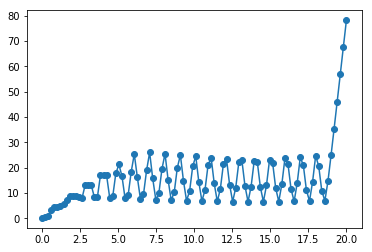

In [5]:
args = {'Phi_min':-4*pi,'Phi_max':4*pi,'Qdim':20,'gridsize':20,'Phi0':0}
NN = 100
ng_list = np.linspace(0,20,NN)
spectrum = E_versus_ng(ng_list,params,args)
plt.plot(spectrum[:,0],spectrum[:,1],'o-')

The above plot shows the E01 transition as a function of offset charge ng for fix external frustration. The dimension of Q matrix is 20. We see that if ng is less than 8, the amplitude of energy oscillation between ng at integers and half integers is not stable. It seems that it is necessary to choose at least 10 as the dimension of Q matrix.

The two plots below are calculated using Qdim=20 for external frustration at zero and half. We see that the eneryg of 01 transition is periodic with respect to offset charges. 

In [13]:
args = {'Phi_min':-4*pi,'Phi_max':4*pi,'Qdim':20,'gridsize':20,'Phi0':0}
NN = 100
ng_list = np.linspace(10,15,NN)
spectrum0 = E_versus_ng(ng_list,params,args)

Text(0.5,1,'Phi_ext = 0')

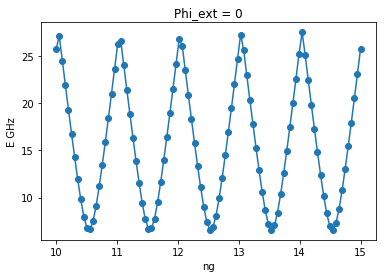

In [20]:
plt.plot(spectrum0[:,0],spectrum0[:,1],'o-')
plt.xlabel('ng')
plt.ylabel('E GHz')
plt.title('Phi_ext = 0')

In [15]:
args = {'Phi_min':-4*pi,'Phi_max':4*pi,'Qdim':20,'gridsize':20,'Phi0':pi}
NN = 100
ng_list = np.linspace(10,15,NN)
spectrum_pi = E_versus_ng(ng_list,params,args)

Text(0.5,1,'Phi_ext = pi')

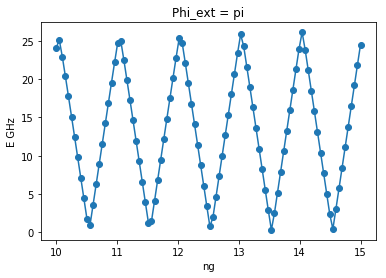

In [19]:
plt.plot(spectrum_pi[:,0],spectrum_pi[:,1],'o-')
plt.xlabel('ng')
plt.ylabel('E GHz')
plt.title('Phi_ext = pi')